In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [0]:
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

df = web.DataReader('005930.KS', 'yahoo',start,end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

In [62]:
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
print(df.head())

               High      Low     Open    Close      Volume   Adj Close
Date                                                                  
2015-01-02  26800.0  26540.0  26800.0  26600.0   8774950.0  257.958313
2015-01-05  26720.0  26260.0  26720.0  26660.0  10139500.0  258.540161
2015-01-06  26340.0  25760.0  26300.0  25900.0  15235500.0  251.169937
2015-01-07  26220.0  25640.0  25880.0  26140.0  14322750.0  253.497406
2015-01-08  26780.0  26200.0  26780.0  26280.0  14477600.0  254.855087


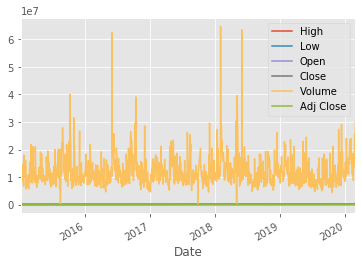

In [63]:
df.plot()
plt.show()

In [0]:
df.to_csv('005930.csv')

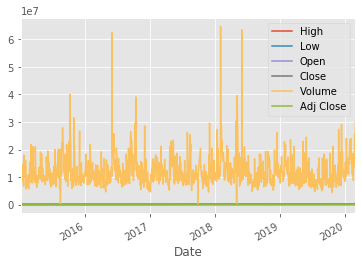

In [65]:
df = pd.read_csv('005930.csv', parse_dates=True, index_col=0)
df.plot()
plt.show()

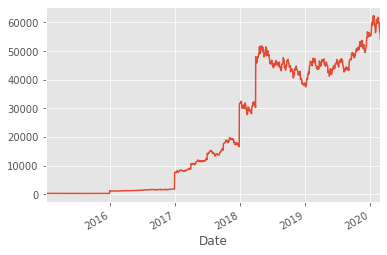

In [66]:
df["Adj Close"].plot()
plt.show()

In [67]:
print(df[['Open', 'High']].head())

               Open     High
Date                        
2015-01-02  26800.0  26800.0
2015-01-05  26720.0  26720.0
2015-01-06  26300.0  26340.0
2015-01-07  25880.0  26220.0
2015-01-08  26780.0  26780.0


In [75]:
# window 갯수 씩 mean() 평균을 넣는다. 즉 100일의 평균을 구함
# min_peridos 최소 갯수, window가 100일 경우 99일까지는 Nan으로 표기되지만
# min_peridos를 선언하면 해당 갯수만큼의 mena() 값이 들어간다. 
# https://ordo.tistory.com/67
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
# nan 이 있으면 해당 row drop
df.dropna(inplace=True)
print(df.head())

               High      Low     Open  ...      Volume    Adj Close        100ma
Date                                   ...                                      
2016-08-08  31500.0  31120.0  31320.0  ...  11125150.0  1563.187744  1563.187744
2016-08-09  31580.0  31140.0  31480.0  ...   9023200.0  1561.195312  1562.191528
2016-08-10  31400.0  30680.0  31340.0  ...  12340350.0  1535.291382  1553.224813
2016-08-11  31180.0  30520.0  30820.0  ...  10533600.0  1553.224731  1553.224792
2016-08-12  31400.0  30880.0  31180.0  ...  10474850.0  1539.276733  1550.435181

[5 rows x 7 columns]


No handles with labels found to put in legend.


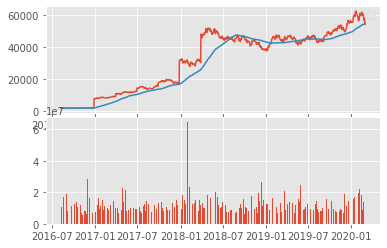

In [95]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan=5, colspan=1,sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax1.legend()
ax2.bar(df.index, df['Volume'])

plt.show()